In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import glob

# jtplot.style('onedork',figsize=(20, 10), fscale=2)
jtplot.style('grade3',figsize=(20, 10), fscale=2)

In [5]:
pilot_data_path = '/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_criterion/'


subj_data_files = glob.glob(pilot_data_path + '/*_criterion_*[0-9].csv') #match pattern for exp. data file 
run_data_files = glob.glob(pilot_data_path + '/*_criterion_*runInfo.csv') #match pattern for exp. data file 

subj_data_file_list = []

for file in subj_data_files:
    subj_sample_df = pd.read_csv(file,index_col=None)
    subj_data_file_list.append(subj_sample_df)
    
    
run_data_file_list = []

for file in run_data_files:
    run_data_df = pd.read_csv(file,index_col=None)
    run_data_file_list.append(run_data_df)

pilot_criterion_df = pd.concat(subj_data_file_list, axis=0, ignore_index = True) #append rows
pilot_criterion_df.columns = pilot_criterion_df.columns.str.strip()
pilot_criterion_df.subj_id = pilot_criterion_df.subj_id.astype('int')

run_criterion_df = pd.concat(run_data_file_list, axis=0, ignore_index = True) #append rows
run_criterion_df.columns = run_criterion_df.columns.str.strip()

In [6]:
subj_data_files

['/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_criterion/1236_criterion_02172019_153318.csv',
 '/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_criterion/1237_criterion_02182019_155543.csv',
 '/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_criterion/1235_criterion_02132019_170735.csv',
 '/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_criterion/1234_criterion_02132019_125303.csv']

In [16]:
time_to_criterion = np.mean(run_criterion_df.total_exp_time) / 60 
std_to_criterion = np.round(np.std(run_criterion_df.total_exp_time) / 60 ,2)

In [17]:
print('time in minutes to reach criterion: ', time_to_criterion, std_to_criterion)

time in minutes to reach criterion:  1.3962938017041515 0.53


In [18]:
run_criterion_df['subj_id'] = np.unique(pilot_criterion_df.subj_id)

In [34]:
run_criterion_df.groupby('subj_id').total_exp_time.mean(), run_criterion_df.total_exp_time.std()

(subj_id
 1234    137.909803
 1235     59.640652
 1236     73.119051
 1237     64.441007
 Name: total_exp_time, dtype: float64, 36.51664532858659)

In [35]:
pilot_criterion_df.head()

,trial,subj_id,LR_choice,reward,cumulative_reward,rt,total_trial_time,iti,id_choice,id_solution,id_choice_acc,cum_acc,stim_duration,stim_onset,stim_offset,abs_response_time
0,0.0,1236,NaN,0.0,495.0,NaN,6.297161,1.409076,NaN,102.0,NaN,NaN,6.299984,0.033306,6.333290,1.233402
1,1.0,1236,82.0,1.0,496.0,0.857337,1.500597,1.360937,102.0,102.0,1.0,0.500000,1.499990,7.799959,9.299949,8.657298
2,2.0,1236,82.0,1.0,497.0,0.653748,1.500819,1.342436,102.0,102.0,1.0,0.666667,1.499989,10.716612,12.216601,11.370362
3,3.0,1236,76.0,1.0,498.0,0.460806,1.501015,1.302762,102.0,102.0,1.0,0.750000,1.499978,13.616608,15.116586,14.077416
4,4.0,1236,82.0,1.0,499.0,0.564288,1.500902,1.302200,102.0,102.0,1.0,0.800000,1.499988,16.483246,17.983234,17.047536


In [21]:
pilot_criterion_df.groupby('subj_id').trial.count()

subj_id
1234    20
1235    46
1236    20
1237    23
Name: trial, dtype: int64

In [34]:
print('mean rt: ', pilot_criterion_df.groupby('subj_id').rt.mean(), 'std rt: ', pilot_criterion_df.groupby('subj_id').rt.std())

mean rt:  subj_id
1234.0    0.524336
1235.0    0.590098
Name: rt, dtype: float64 std rt:  subj_id
1234.0    0.102838
1235.0    0.102284
Name: rt, dtype: float64


In [37]:
print('mean acc: ', pilot_criterion_df.groupby('subj_id').id_choice_acc.mean(), 'std acc: ', pilot_criterion_df.groupby('subj_id').id_choice_acc.std())

mean acc:  subj_id
1234.0    1.000000
1235.0    0.933333
Name: id_choice_acc, dtype: float64 std acc:  subj_id
1234.0    0.000000
1235.0    0.252262
Name: id_choice_acc, dtype: float64


In [229]:
pilot_criterion_df.rt.min(), pilot_criterion_df.rt.max()

(0.38529103699966077, 0.86199390799993114)

In [108]:
np.unique(pilot_criterion_df.subj_id)

array([ 1234.,  1235.])

(0, 1.1)

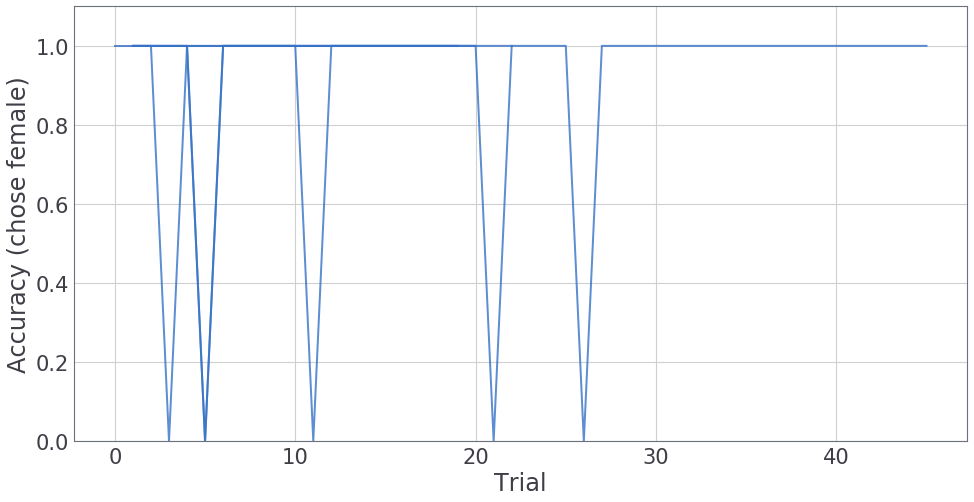

In [22]:
sns.lineplot(x='trial', y='id_choice_acc', data=pilot_criterion_df,units='subj_id', estimator=None, linewidth=2, alpha=0.8)
plt.xlabel('Trial')
plt.ylabel('Accuracy (chose female)')
plt.ylim([0,1.1])

In [23]:
#accidentally had > .95 instead of >= .95 in exp. code
moving_window_avg = 20
sub_window_test_s2 = np.convolve(pilot_criterion_df.loc[pilot_criterion_df.subj_id == 1235].id_choice_acc, np.ones((moving_window_avg,))/moving_window_avg, mode='valid')
sub_window_test_s1 = np.convolve(pilot_criterion_df.loc[pilot_criterion_df.subj_id == 1234].id_choice_acc, np.ones((moving_window_avg,))/moving_window_avg, mode='valid')

In [24]:
def moving_window(acc_data, moving_window=20):
    elgible_data = acc_data[moving_window:]
    
    for t in range(len(elgible_data)):
        print(sum(elgible_data[-moving_window:])/moving_window)

In [25]:
test = pilot_criterion_df.loc[pilot_criterion_df.subj_id == 1235].id_choice_acc
moving_window(test)

0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95
0.95


Text(0,0.5,'accuracy (chose female)')

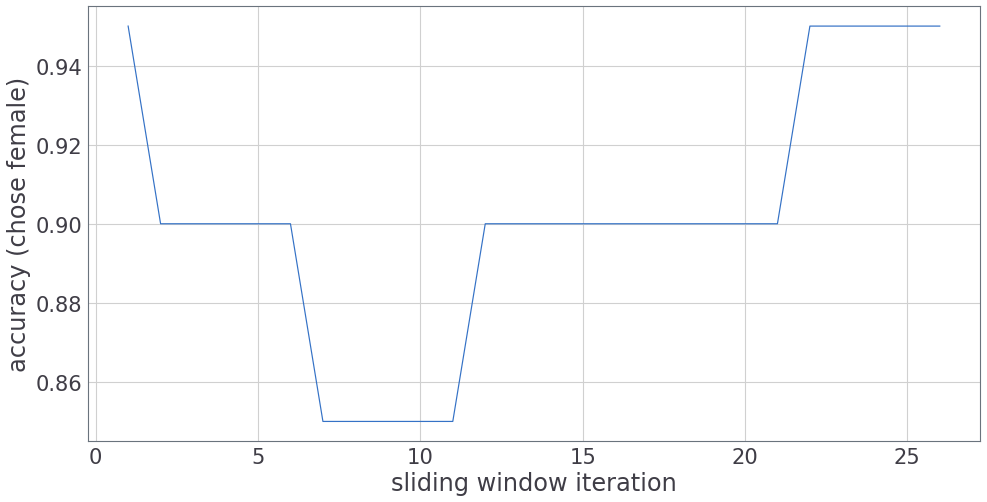

In [26]:
plt.plot(sub_window_test_s2)
plt.xlabel('sliding window iteration')
plt.ylabel('accuracy (chose female)')

In [27]:
pilot_criterion_df.loc[pilot_criterion_df.subj_id == 1235].id_choice_acc[-20:].mean()
pilot_criterion_df.loc[pilot_criterion_df.subj_id == 1234].id_choice_acc[-20:].mean()

1.0

In [227]:
# sns.lineplot(x='trial', y='cum_acc', data=pilot_criterion_df,units='subj_id', estimator=None, linewidth=2, alpha=0.8)
# plt.xlabel('Trial')
# plt.ylabel('Cumulative accuracy (chose female)')

(0, 1.1)

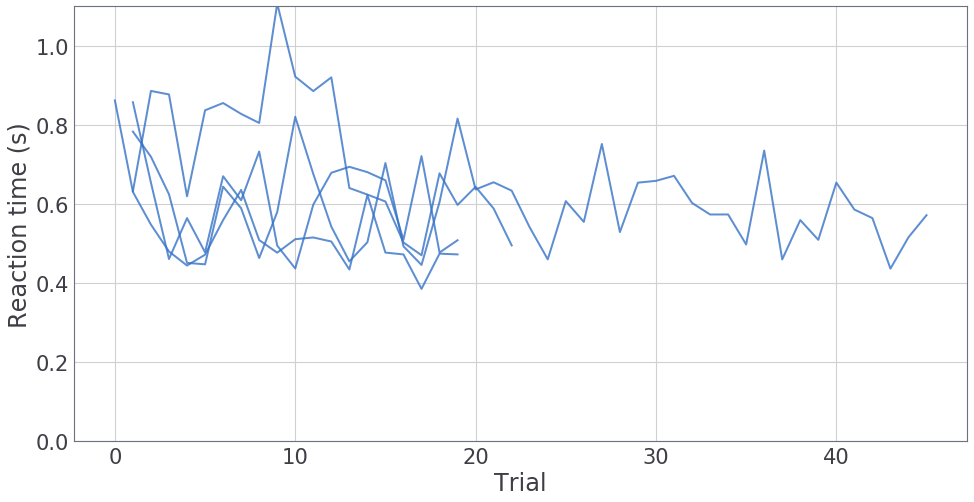

In [28]:
sns.lineplot(x='trial', y='rt', data=pilot_criterion_df,units='subj_id', estimator=None, linewidth=2, alpha=0.8)

plt.xlabel('Trial')
plt.ylabel('Reaction time (s)')
plt.ylim([0,1.1])

/Users/Krista/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Krista/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Probability density')

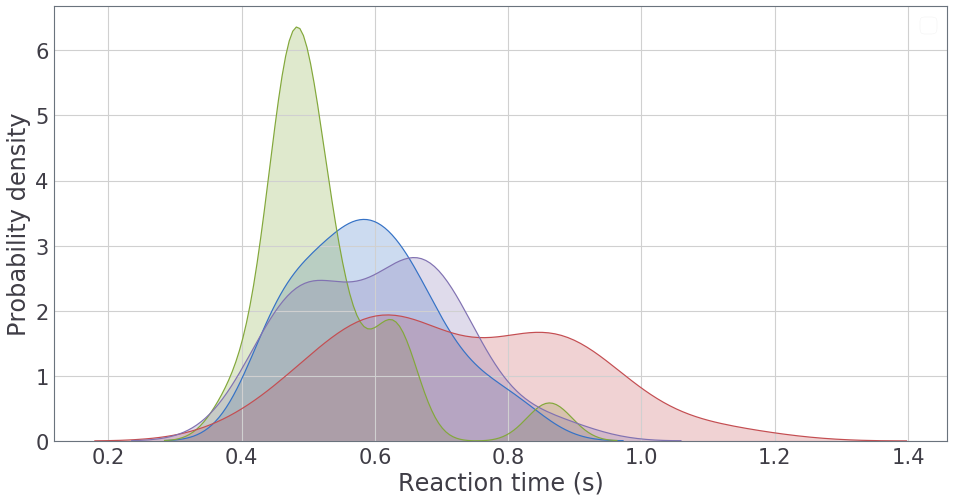

In [33]:
sns.kdeplot(pilot_criterion_df.rt.loc[pilot_criterion_df.subj_id == 1235], shade=True)
sns.kdeplot(pilot_criterion_df.rt.loc[pilot_criterion_df.subj_id == 1234], shade=True)
sns.kdeplot(pilot_criterion_df.rt.loc[pilot_criterion_df.subj_id == 1237], shade=True)
sns.kdeplot(pilot_criterion_df.rt.loc[pilot_criterion_df.subj_id == 1236], shade=True)

plt.legend('')
plt.xlabel('Reaction time (s)')
plt.ylabel('Probability density')